<a href="https://colab.research.google.com/github/rahulll-gif/task1/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (5).zip to archive (5) (1).zip
Extracted: ['Iris.csv', 'database.sqlite']
Dataset Head:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
K=1 Accuracy: 1.00


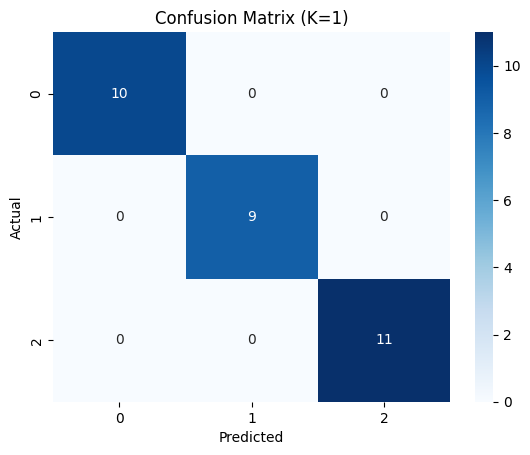

K=3 Accuracy: 1.00


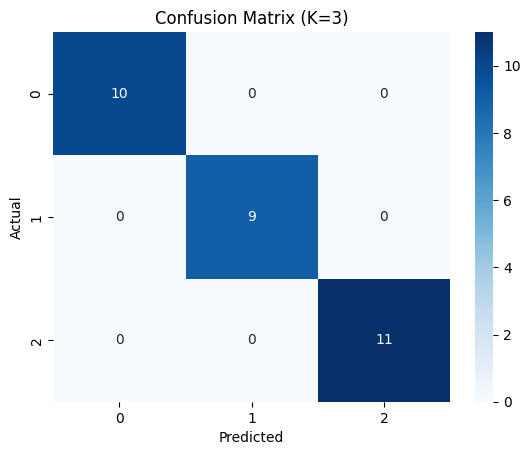

K=5 Accuracy: 1.00


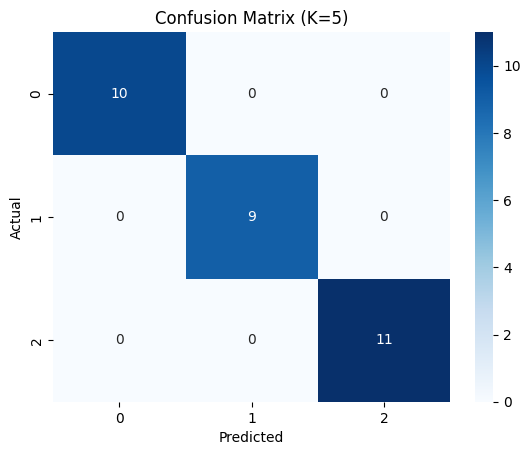

K=7 Accuracy: 1.00


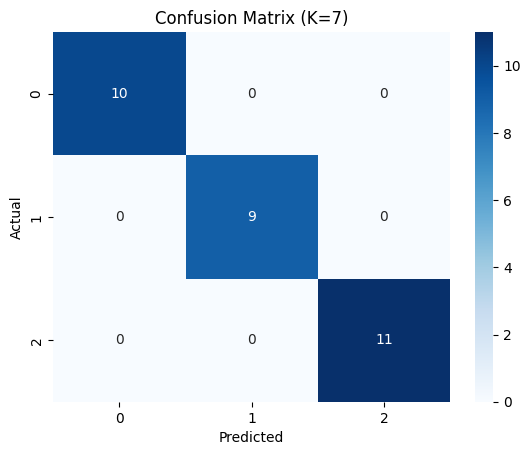

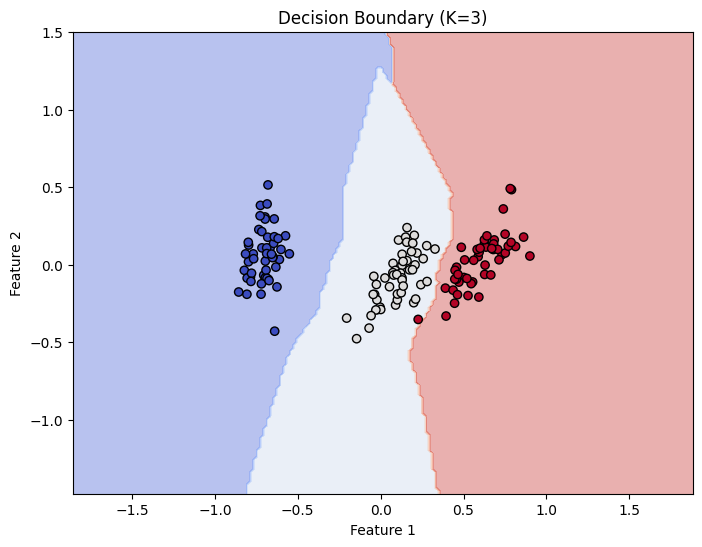

In [2]:
from google.colab import files
uploaded = files.upload()
import zipfile
import os

for file in uploaded:
    if file.endswith('.zip'):
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall("dataset")
            print("Extracted:", zip_ref.namelist())

import pandas as pd

data_path = None
for root, dirs, files in os.walk("dataset"):
    for file in files:
        if file.endswith(".csv"):
            data_path = os.path.join(root, file)
            break

if data_path is None:
    raise Exception("No CSV file found in ZIP. Please check your dataset.")

df = pd.read_csv(data_path)
print("Dataset Head:")
print(df.head())

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

df = df.dropna()
df = df.select_dtypes(include=[float, int, object])

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

k_values = [1, 3, 5, 7]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k} Accuracy: {acc:.2f}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix (K={k})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
from sklearn.decomposition import PCA
import numpy as np

if X_scaled.shape[1] > 2:
    pca = PCA(n_components=2)
    X_vis = pca.fit_transform(X_scaled)
else:
    X_vis = X_scaled

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_vis, y)
h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.title("Decision Boundary (K=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
